In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import requests
import time
import re

In [2]:
#####1. 데이터 수집######

# 수집기간1(팬데믹: 2022.12.)
columns_to_read = ['언론사', 'URL']
df1 = pd.read_excel('NewsResult_20221201-20221231.xlsx', usecols=columns_to_read)

result_dict1 = df1.groupby('언론사')['URL'].agg(list).to_dict()

joongang1_list = []
hankyure1_list = []
kyunghyang1_list = []
donga1_list = []

# 1) 중앙일보 기사

df_joongang1 = pd.DataFrame(result_dict1['중앙일보'], columns=['url'])

for joongang_url in df_joongang1['url']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang1_list.append(txt_remove_email)
    else:
        joongang1_list.append('None')
        
    time.sleep(1)

df_joongang1['result'] = joongang1_list
df_joongang1.to_excel("joongang_pandemic.xlsx")
    
# 2) 한겨레 기사

df_hankyure1 = pd.DataFrame(result_dict1['한겨레'], columns=['url'])

for hankyure_url in df_hankyure1['url']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure1_list.append(txt_remove_email)
    else:
        hankyure1_list.append('None')
        
    time.sleep(1)

df_hankyure1['result'] = hankyure1_list
df_hankyure1.to_excel("hankyure_pandemic.xlsx")
    
    
# 3) 경향신문 기사

df_kyunghyang1 = pd.DataFrame(result_dict1['경향신문'], columns=['url'])

# requests forbidden 문제 해결 코드
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in df_kyunghyang1['url']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang1_list.append(txt_remove_email)
    else:
        kyunghyang1_list.append('None')
    
    time.sleep(1)

df_kyunghyang1['result'] = kyunghyang1_list
df_kyunghyang1.to_excel("kyunghyang_pandemic.xlsx")
    
# 4) 동아일보 기사

df_donga1 = pd.DataFrame(result_dict1['동아일보'], columns=['url'])

for donga_url in df_donga1['url']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga1_list.append(txt_remove_email)
    else:
        donga1_list.append('None')
        
    time.sleep(1)

df_donga1['result'] = donga1_list
df_donga1.to_excel("donga_pandemic.xlsx")    

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# 수집기간2(엔데믹: 2023.7)
columns_to_read = ['언론사', 'URL']
df2 = pd.read_excel('NewsResult_20230701-20230731.xlsx', usecols=columns_to_read)

result_dict2 = df2.groupby('언론사')['URL'].agg(list).to_dict()

joongang2_list = []
hankyure2_list = []
kyunghyang2_list = []
donga2_list = []

# 1) 중앙일보 기사

df_joongang2 = pd.DataFrame(result_dict2['중앙일보'], columns=['url'])

for joongang_url in result_dict2['중앙일보']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang2_list.append(txt_remove_email)
    else:
        joongang2_list.append('None')
        
    time.sleep(2)

df_joongang2['result'] = joongang2_list
df_joongang2.to_excel("joongang_endemic.xlsx")
    
# 2) 한겨레 기사

df_hankyure2 = pd.DataFrame(result_dict2['한겨레'], columns=['url'])

for hankyure_url in df_hankyure2['url']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure2_list.append(txt_remove_email)
    else:
        hankyure2_list.append('None')
        
    time.sleep(1)

df_hankyure2['result'] = hankyure2_list
df_hankyure2.to_excel("hankyure_endemic.xlsx")
    
    
# 3) 경향신문 기사

df_kyunghyang2 = pd.DataFrame(result_dict2['경향신문'], columns=['url'])

# requests forbidden 문제 해결
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in df_kyunghyang2['url']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang2_list.append(txt_remove_email)
    else:
        kyunghyang2_list.append('None')
    
    time.sleep(1)

df_kyunghyang2['result'] = kyunghyang2_list
df_kyunghyang2.to_excel("kyunghyang_endemic.xlsx")
    
# 4) 동아일보 기사

df_donga2 = pd.DataFrame(result_dict2['동아일보'], columns=['url'])

for donga_url in df_donga2['url']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga2_list.append(txt_remove_email)
    else:
        donga2_list.append('None')
        
    time.sleep(1)

df_donga2['result'] = donga2_list
df_donga2.to_excel("donga_endemic.xlsx")    

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
import re
from collections import Counter

In [15]:
##### 2. 한글 전처리######

kiwi = Kiwi()
stopwords_dict = Stopwords()

# 불용어 사용자 정의

customized_stopwords = ['올해', '지난해', '내년', '이후', '상반기', '하반기', '기자', '사진']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNG')) 
    
customized_stopwords = ['연합뉴스', '중앙일보', '동아일보', '한겨레', '경향신문']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNP'))

In [9]:
def list_to_string(media_list):
    media_string =' '.join(media_list) 
    return media_string

In [10]:
def preprocessing(media_string):
        
    filtered_content = re.sub(r'[^\s\w\d]', '', media_string)
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords = stopwords_dict) 
    noun_words = []
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            noun_words.append(token.form)
        
    final_noun_words = []
    for word in noun_words:
        if len(word) > 1:
            final_noun_words.append(word)
        
    return final_noun_words

In [11]:
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [12]:
def select_words(K, media_string):
    c = Counter(preprocessing(media_string))
    selected_words = get_words(c.most_common(K))
    return selected_words

In [25]:
total_list = []
from collections import defaultdict
political_result = defaultdict(lambda: defaultdict(list))

In [26]:
political_map = {
    '한겨레':'진보', 
    '경향':'진보',
    '중앙':'보수',
    '동아':'보수'
}
en_to_ko_translate_map = {
    'joongang': '중앙',
    'donga': '동아',
    'hankyure': '한겨레',
    'kyunghyang': '경향',
    'pandemic': '팬데믹',
    'endemic': '엔데믹'
}
ko_to_en_translate_map = {v: k for k, v in en_to_ko_translate_map.items()}

In [27]:
newspapers = ['joongang', 'donga', 'hankyure','kyunghyang']
periods = ['pandemic', 'endemic']

for newspaper in newspapers:
    for period in periods:
        newspaper_ko, period_ko = en_to_ko_translate_map[newspaper], en_to_ko_translate_map[period]
        df = pd.read_excel(f'{newspaper}_{period}.xlsx',index_col=0)
        text_list = df['result'].values.tolist()
        total_list.append([newspaper_ko, text_list, period_ko])
        political_result[political_map[newspaper_ko]][period_ko].extend(text_list)

In [7]:
for political_type, texts_by_period in political_result.items():
    total_list.append([political_type, texts_by_period['팬데믹'], '팬데믹'])
    total_list.append([political_type, texts_by_period['엔데믹'], '엔데믹'])

In [22]:
top_freq_result = []
for name, text_list, period in total_list:
    string_result = list_to_string(text_list)
    selected_result = select_words(10, string_result)
    top_freq_result.append([name, ', '.join(selected_result), period])

In [23]:
top_freq_result_df = pd.DataFrame(top_freq_result, columns=['name','top_freq','period'])
#top_freq_result_df

In [24]:
top_freq_pivot_result_df = top_freq_result_df.pivot(index='name',columns='period', values='top_freq')
top_freq_pivot_result_df

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# 2) 워드클라우드
import matplotlib.font_manager as fm
def wordcloud(media_string, newspaper, period):
    newspaper_en, period_en = ko_to_en_translate_map[newspaper], ko_to_en_translate_map[period]
    final_noun_words = preprocessing(media_string)
    cleaned_words =' '.join(final_noun_words)
    wc = WordCloud(font_path='malgun', background_color='white', repeat=True) 
    wc.generate(cleaned_words)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f'{newspaper_en}_{period_en}')
    plt.show()
    wc.to_file(f'{newspaper_en}_{period_en}.png') # Q > 함수에 투입하는 데이터별로 파일명 따로 지정하는 방법이 있을까?

In [ ]:
for newspaper, media_string, period in total_list:
    wordcloud(' '.join(media_string), newspaper, period)

In [30]:
#### 4. 네트워크 분석 ####

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import networkx as nx
def construct_network(text):
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    DTM_tf = vectorizer.fit_transform(text)
    feature_names = vectorizer.get_feature_names_out()
    DTM = np.array(DTM_tf.todense())
    DTM_binary = np.sign(DTM)
    words_cooccurrence = np.dot(DTM_binary.T, DTM_binary)
    np.fill_diagonal(words_cooccurrence, 0)
    #print(feature_names) # 네트워크를 구성하는 단어 출력하기
    #print(words_cooccurrence) # 단어들 간의 인접행렬 출력하기
    g = nx.convert_matrix.from_numpy_array(words_cooccurrence)
    mapping = {}
    for k, word in enumerate(feature_names):
        mapping[k]=word
    g1 = nx.relabel_nodes(g, mapping)
    return g1

In [31]:
def get_text_network(media_list, selected_words):
    cleaned_articles = [preprocessing(article) for article in media_list] # Q> 오류. expected string or bytes-like object, got 'list'
    new_docs=[]
    for article in cleaned_articles:
        new_doc=[]
        for word in article:
            if word in selected_words:
                new_doc.append(word)
        if len(new_doc)>1:
            new_docs.append(' '.join(new_doc))
    return construct_network(new_docs)

In [32]:
j1_nw = get_text_network(joongang1_list, j1_w)

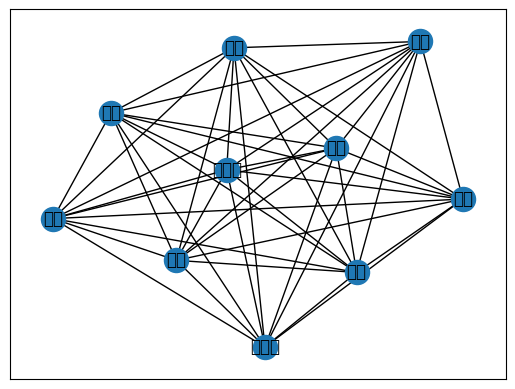

In [36]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
nx.draw_networkx(j1_nw)
plt.show()
nx.write_graphml(j1_nw, '중앙일보 팬데믹.graphml')